In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'axes.labelweight': 'bold',
          'axes.titleweight':'bold',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from matplotlib import rcParams
rcParams['font.family'] = 'monospace'

In [2]:
np.random.seed(20)

# Basic Code Precision@K and Recall@K

In [25]:
retrievd_1

[1, 0, 0, 1, 0, 1, 0, 0, 0, 1]

In [26]:
retrievd_2

[0, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [27]:
def prec_rec_at_k(retrieved:list):
    n = len(retrieved)
    K = 1
    hits = 0
    ls_k = []
    ls_precision_at_k = []
    ls_recall_at_k = []

    for i in range(n):
        if retrieved[i] == 1:
            hits += 1

        precision_at_k = float(hits)/float(K)
        recall_at_k = float(hits)/float(tot_relevant_doc)

        ls_k.append(K)
        ls_precision_at_k.append(precision_at_k)
        ls_recall_at_k.append(recall_at_k)

        K += 1
        
    return ls_k, ls_precision_at_k, ls_recall_at_k

In [100]:
def get_prec_rec_at_k_util(retrieved):
    ls_k, ls_precision_at_k, ls_recall_at_k = prec_rec_at_k(retrieved)
    df_metric = pd.DataFrame({"@K":ls_k, "PRECISION": 
                              ls_precision_at_k, 
                              "RECALL": ls_recall_at_k})
    df_metric['retrieved_result'] = retrieved
    return df_metric

def plt_prec_rec_at_k(ls_df):
    n = len(ls_df)
    ls_color_map = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    for i in range(n):
        plt.plot(ls_df[i]['RECALL'].values, 
                 ls_df[i]['PRECISION'].values,
                 color=ls_color_map[i], 
                 alpha=0.8, 
                 label=f'Algo {i+1}')
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision Recall @K")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

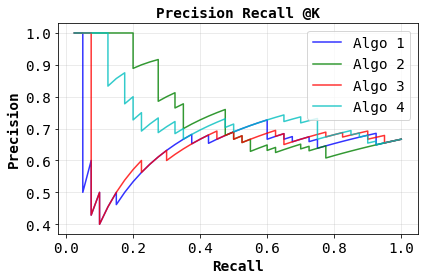

In [105]:
tot_relevant_doc = 40
tot_doc = int(tot_relevant_doc*1.5)

original = [1]*tot_relevant_doc + [0]*(tot_doc - tot_relevant_doc)
retrievd_1 = list(np.random.permutation(original))
retrievd_2 = list(np.random.permutation(retrievd_1))
retrievd_3 = list(np.random.permutation(original))
retrievd_4 = list(np.random.permutation(original))

df_metric_1 = get_prec_rec_at_k_util(retrievd_1)
df_metric_2 = get_prec_rec_at_k_util(retrievd_2)
df_metric_3 = get_prec_rec_at_k_util(retrievd_3)
df_metric_4 = get_prec_rec_at_k_util(retrievd_4)

plt_prec_rec_at_k([df_metric_1, df_metric_2, df_metric_3, df_metric_4])